Import required libraries and choose dataset

In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting
from sklearn import linear_model # for linear regression
from sklearn.model_selection import train_test_split # for splitting the dataset into training and testing samples
 

import os
for dirname, _, filenames in os.walk('C:/Users/Hp/Documents/DataSets'):
    for filename in filenames:
        print(dirname + '/' + filename)



C:/Users/Hp/Documents/DataSets/86063c99-c4fa-420b-9941-045f8b24b576.csv
C:/Users/Hp/Documents/DataSets/anypicker-download.csv
C:/Users/Hp/Documents/DataSets/Housing.csv
C:/Users/Hp/Documents/DataSets/Housing_linear.csv
C:/Users/Hp/Documents/DataSets/Research1.csv
C:/Users/Hp/Documents/DataSets/SxSW_2016_Leads_20231227.csv
C:/Users/Hp/Documents/DataSets/Team 2 Final Dataset.csv


Choose Housing_linear dataset. 
This dataset contains two columns ['price'] and ['area'] 

In [5]:
data = pd.read_csv('C:/Users/Hp/Documents/DataSets/Housing_linear.csv')
print("column names: ",data.columns[0], ',', data.columns[1] )
print("Rows: ", data.shape[0])
print("Columns: ", data.shape[1])

column names:  price , area
Rows:  47
Columns:  2


Plot the independant variable on x-axis and dependent variable on y-axis

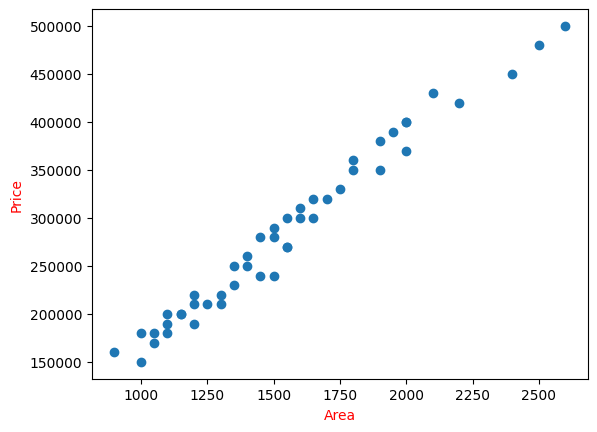

In [6]:
plt.scatter(data['area'], data['price'])
plt.xlabel("Area", color='red')
plt.ylabel("Price", color='red', fontdict={'fontfamily':'Sans Serif'})
plt.show()

Separating the features and target variable into X and Y variables

In [7]:
x = data['area'] # feature
y = data['price'] # target variable

Splitting the data into training and testing samples. Here the test size is 20% of the total dataset and seed is 42

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Converting the training and testing samples into numpy arrays and reshaping if necessary

In [9]:
X_train = X_train.to_numpy() 
Y_train = Y_train.to_numpy() 

X_test = X_test.to_numpy() 
Y_test = Y_test.to_numpy()


X_train = X_train.reshape(-1, 1) # reshaping single feature into 2 array
X_test = X_test.reshape(-1, 1) # reshaping single feature into 2 array

Creating a LinearRegression object and fitting the model with the training data 

In [10]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Now Let's check if the model performs well on test data

In [11]:
Y_pred = model.predict(X_test)

# reshaping data to make it one_dimensional for creating pandas dataframe
Y_pred = Y_pred.reshape(-1) 
X_test = X_test.reshape(-1)

prediction_data = {'Predicted_price': Y_pred, 'Area': X_test} 
prediction = pd.DataFrame(data=prediction_data)
prediction # we got the predicted_price and area dataframe

,Predicted_price,Area
0,231085.630178,1300
1,177267.051255,1050
2,295667.924887,1600
3,510942.240581,2600
4,188030.767039,1100
5,403305.082734,2100
6,263376.777532,1450
7,274140.493317,1500
8,252613.061748,1400
9,381777.651164,2000


Let's create a dataframe for test sample

In [12]:
test_data = {'Price':Y_test, 'Area':X_test}
test = pd.DataFrame(data=test_data)
test

,Price,Area
0,220000,1300
1,180000,1050
2,310000,1600
3,500000,2600
4,190000,1100
5,430000,2100
6,240000,1450
7,290000,1500
8,250000,1400
9,400000,2000


Plotting Prediction data

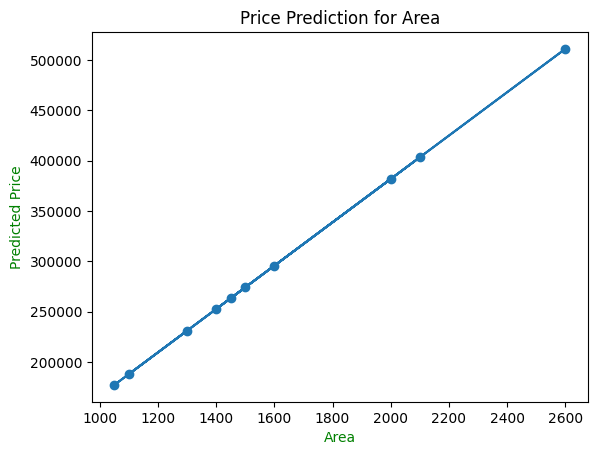

In [13]:
plt.plot(X_test, Y_pred, marker='o') #prediction plot
plt.title("Price Prediction for Area")
plt.xlabel('Area', color='green')
plt.ylabel("Predicted Price", color='green')
plt.show()

Plotting Test data

Text(0, 0.5, 'Price')

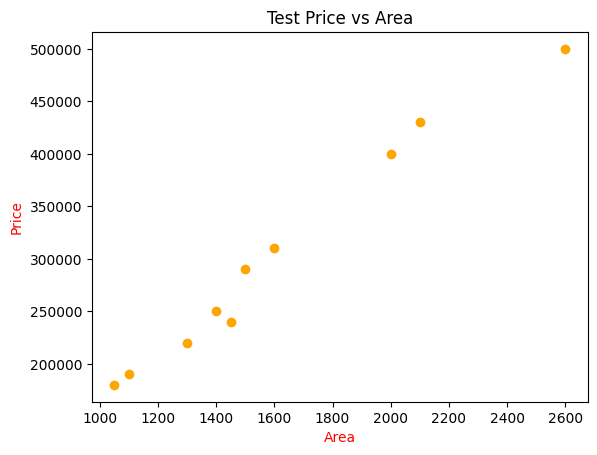

In [14]:
plt.scatter(X_test, Y_test, color='orange')
plt.title('Test Price vs Area')
plt.xlabel('Area', color='red')
plt.ylabel('Price', color='red')

Plotting test and predicted data together

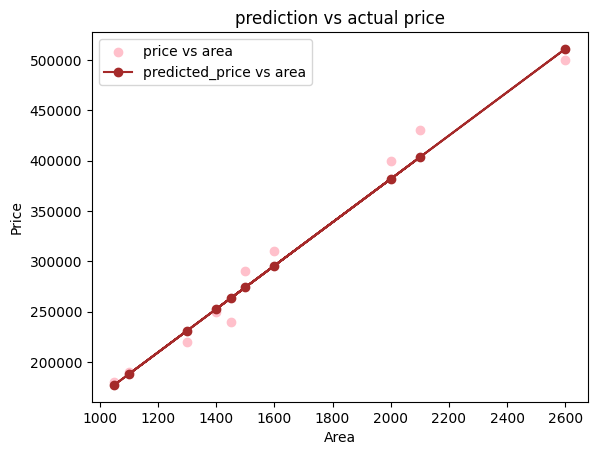

In [15]:
plt.scatter(X_test, Y_test, color='pink', label='price vs area') # test plot
plt.plot(X_test, Y_pred, marker='o', color='brown', label='predicted_price vs area') # preediction plot
plt.title("prediction vs actual price")
plt.xlabel('Area')
plt.ylabel("Price")
plt.legend()
plt.show()

> ## Model Evaluation

There are three measures for evaluating the performance of linear regression models:
- **Mean Squared Error**
- **Mean Absolute Error**
- **R_Sqaured**

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [17]:
mse = mean_squared_error(test['Price'], prediction['Predicted_price'])
mse

230887746.63889384

In [18]:
rmse = np.sqrt(mse)
rmse

15194.99084036887

In [19]:
mae = mean_absolute_error(test['Price'], prediction['Predicted_price'])
mae

12782.873964342532

In [20]:
r2 = r2_score(test['Price'], prediction['Predicted_price'])
r2

0.9782366154549068

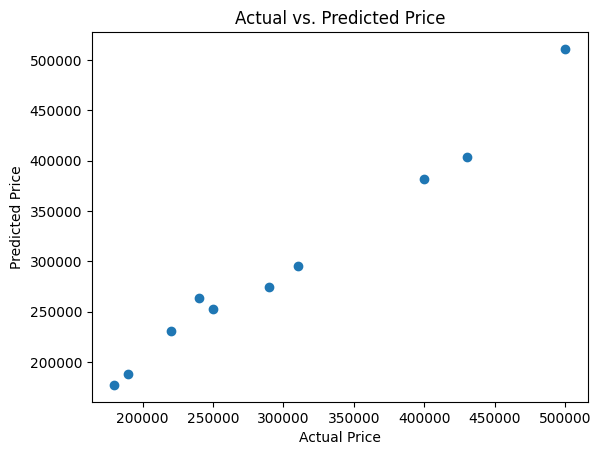

In [21]:

plt.scatter(test['Price'], prediction['Predicted_price'])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Price")
plt.show()
